<a href="https://colab.research.google.com/github/Wanita-8943/Project_2023/blob/main/Predict_All_Re4_1e-4_16_0.2_250_Unfreeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 837, done.
remote: Counting objects: 100% (359/359), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 837 (delta 255), reused 328 (delta 235), pack-reused 478
Receiving objects: 100% (837/837), 13.82 MiB | 9.70 MiB/s, done.
Resolving deltas: 100% (495/495), done.
/content/efficientnet_keras_transfer_learning


In [6]:
import sys
sys.path.append('/content/drive/MyDrive/cut_panoramic/Model/4Re_All_1G_1e-4_16_0.2_250_New_Unfreez.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [7]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/cut_panoramic/Model/4Re_All_1G_1e-4_16_0.2_250_New_Unfreez.h5')
height = width = model.input_shape[1]

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [8]:
df = pd.read_csv (f'/content/drive/MyDrive/cut_panoramic/Data/All_Re.csv')
df

,Fig_Age,Fig_Person_Sex,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
0,1,1,7,Y07F,1,V1.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
1,2,1,7,Y07F,1,Flip_V1.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
2,3,2,7,Y07F,1,V2.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
3,4,2,7,Y07F,1,Flip_V2.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
4,5,3,7,Y07F,1,V3.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
...,...,...,...,...,...,...,...,...,...
4745,121,77,25,Y25M,19,Flip_J463.jpg,/content/drive/My Drive/TVT_Gender/test/Male/F...,Male,Both
4746,122,78,25,Y25M,19,J464.jpg,/content/drive/My Drive/TVT_Gender/test/Male/J...,Male,Both
4747,123,78,25,Y25M,19,Flip_J464.jpg,/content/drive/My Drive/TVT_Gender/test/Male/F...,Male,Both
4748,124,79,25,Y25M,19,J465.jpg,/content/drive/My Drive/TVT_Gender/test/Male/J...,Male,Both


In [9]:
train = df[df['Fig_Age'].between(1,75)]
test = df[df['Fig_Age'].between(101,125)]

In [10]:
DATA_PATH = "/content/drive/My Drive/TVT_Gender"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'test')
print(test_dir)

/content/drive/My Drive/TVT_Gender/train
/content/drive/My Drive/TVT_Gender/test


In [11]:
# base_dir = '/content/drive/MyDrive/TVT_Gender'
# os.makedirs(base_dir, exist_ok=True)

# # Directories for our training,
# # validation and test splits
# train_dir = os.path.join(base_dir, 'train')
# os.makedirs(train_dir, exist_ok=True)
# validation_dir = os.path.join(base_dir, 'validation')
# os.makedirs(validation_dir, exist_ok=True)
# test_dir = os.path.join(base_dir, 'test')
# # os.makedirs(test_dir, exist_ok=True)

In [12]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_filename',
        y_col = 'Class_Re',
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode = 'other')

#label
# labels = (train_generator.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# print(labels)

Found 2850 validated image filenames.


In [13]:
test = df[df['Fig_Age'].between(101,125)]
test

,Fig_Age,Fig_Person_Sex,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
100,101,51,7,Y07F,1,V67.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
101,102,51,7,Y07F,1,Flip_V67.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
102,103,52,7,Y07F,1,V68.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
103,104,52,7,Y07F,1,Flip_V68.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
104,105,53,7,Y07F,1,V69.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
...,...,...,...,...,...,...,...,...,...
4745,121,77,25,Y25M,19,Flip_J463.jpg,/content/drive/My Drive/TVT_Gender/test/Male/F...,Male,Both
4746,122,78,25,Y25M,19,J464.jpg,/content/drive/My Drive/TVT_Gender/test/Male/J...,Male,Both
4747,123,78,25,Y25M,19,Flip_J464.jpg,/content/drive/My Drive/TVT_Gender/test/Male/F...,Male,Both
4748,124,79,25,Y25M,19,J465.jpg,/content/drive/My Drive/TVT_Gender/test/Male/J...,Male,Both


In [14]:
act = test['Class_Re'].tolist() #ค่าจริง
path = test['Path_filename'].tolist() #path

In [15]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [16]:
predict_image(path[0])[0]

1/1 [==============================] - 8s 8s/step


3.2641954

In [17]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    pred_list.append(result)
    # prob_list.append(predict[result])

1/1 [==============================] - 0s 48ms/step


In [18]:
pred_list

[3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2643402,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2647018,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2642632,
 3.2657201,
 3.2641954,
 3.2641954,
 3.2641964,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2642298,
 3.3223052,
 3.6478138,
 3.2641954,
 3.2641954,
 3.3163235,
 3.7303662,
 3.264196,
 3.2641954,
 3.3221488,
 3.2658002,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2641954,
 3.264341,
 3.2641954,
 3.2641954,
 3.2641962,
 3.2641954,
 3.264197,
 3.2641954,
 3.2641954,
 3.2641954,
 3.2738981,
 3.7754414,
 3.3030417,
 3.4288669,
 3.364756,
 3.8061802,
 3.93874,
 3.2641962,
 3.2642672,
 3.2641954,
 3.2641954

In [19]:
print(type(pred_list))

<class 'list'>


In [20]:
pred_int = np.around(pred_list)

In [21]:
pred = np.array(pred_int) #แปลงเป็น array
act = np.array(act)

In [22]:
pred

array([ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,
        3.,  3.,  3.,  4.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  3.,  3.,  3.,
        4.,  4.,  3.,  3.,  3.,  3.,  5.,  4.,  3.,  3.,  3.,  4.,  4.,
        3.,  3.,  3.,  4.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  5.,  3.,  3.,  5.,  5.,  6.,  6.,  4.,  4.,  4.,  4.,
        5.,  5.,  5.,  5.,  6.,  6.,  5.,  5.,  6.,  6.,  5.,  5.,  5.,
        5.,  5.,  6.,  6.,  4.,  5.,  4.,  6.,  6.,  6.,  5.,  6.,  6.,
        5.,  5.,  6.,  5.,  5.,  6.,  6.,  7.,  7.,  6.,  7.,  7.,  7.,
        5.,  5.,  7.,  7.,  4.,  6.,  6.,  7.,  7.,  6.,  6.,  6.,  8.,
        7.,  6.,  7.,  7.,  7.,  7.,  9.,  7.,  7., 11., 10.,  6

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 19.894736842105264%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50
           3       0.24      0.92      0.38        50
           4       0.33      0.26      0.29        50
           5       0.32      0.44      0.37        50
           6       0.25      0.40      0.31        50
           7       0.30      0.44      0.35        50
           8       0.13      0.14      0.14        50
           9       0.11      0.10      0.10        50
          10       0.03      0.02      0.02        50
          11       0.17      0.12      0.14        50
          12       0.07      0.06      0.07        50
          13       0.17      0.16      0.16        50
          14       0.17      0.10      0.12        50
          15       0.19      0.26      0.22        50
          16       0.13      0.36      0.19        50
          17       0.00      0.00      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 66.5, 'Predicted label')

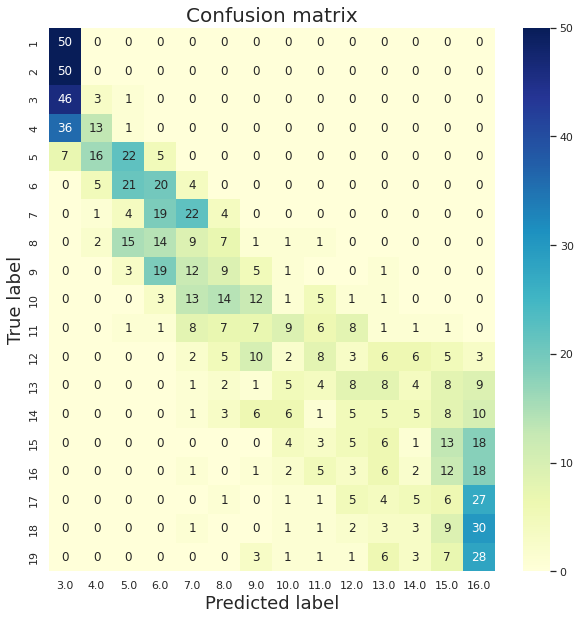

In [24]:
#create CF 
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)